In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing MNIST dataset from keras.datasets

from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

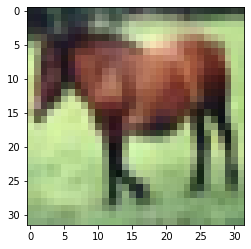

In [11]:
plt.imshow(x_train[7])

In [12]:
#Scaling the data
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
# Converting the labels to categorical values
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [17]:
# Importing libraries required for building CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Create Model
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32,3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32,3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Use Flatten to convert data to 1D Array
model.add(Flatten())

model.add(Dense(256, activation='relu'))

#Output Dense Layer - Activation Function Softmax for Multiclass Classification
model.add(Dense(10, activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
#Initializing Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2 )

In [21]:
#Fit the model
model.fit(x_train, y_cat_train, 
          epochs=15, 
          validation_data=(x_test, y_cat_test), 
          callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4916 - accuracy: 0.4610 - val_loss: 1.2725 - val_accuracy: 0.5404
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1588 - accuracy: 0.5920 - val_loss: 1.0926 - val_accuracy: 0.6156
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0194 - accuracy: 0.6455 - val_loss: 1.0374 - val_accuracy: 0.6373
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9164 - accuracy: 0.6799 - val_loss: 0.9909 - val_accuracy: 0.6575
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8347 - accuracy: 0.7094 - val_loss: 0.9990 - val_accuracy: 0.6503
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7578 - accuracy: 0.7353 - val_loss: 0.9809 - val_accuracy: 0.6656
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6875 - accuracy: 0.7614 - val_loss: 0.9980 -

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.491556,0.46104,1.272546,0.5404
1,1.158762,0.59198,1.092610,0.6156
2,1.019357,0.64550,1.037356,0.6373
3,0.916412,0.67994,0.990872,0.6575
4,0.834693,0.70940,0.999029,0.6503
5,0.757753,0.73532,0.980895,0.6656
6,0.687503,0.76144,0.998039,0.6766
7,0.621735,0.78332,1.011806,0.6773


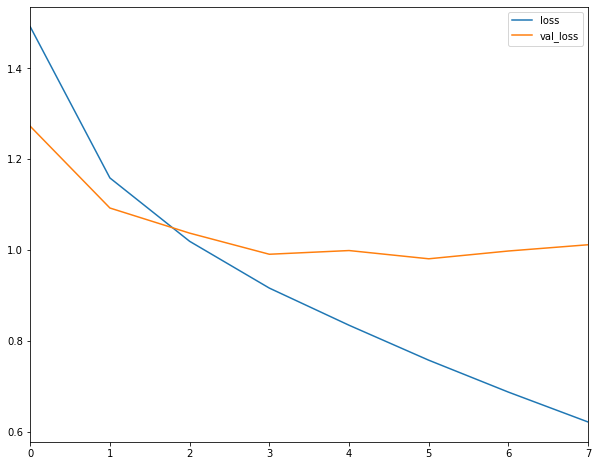

In [37]:
metrics[['loss','val_loss']].plot(xlim=(0,7), figsize=(10,8))

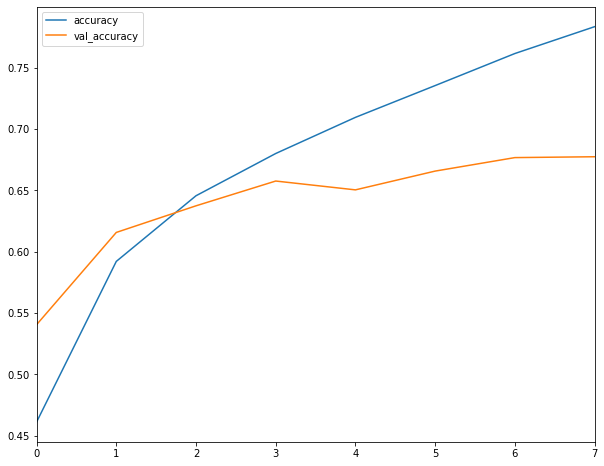

In [36]:
metrics[['accuracy', 'val_accuracy']].plot(xlim=(0,7), figsize=(10,8))

In [41]:
model.metrics_names

['loss', 'accuracy']

In [39]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0118062496185303, 0.677299976348877]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.75      0.85      0.80      1000
           2       0.57      0.58      0.58      1000
           3       0.57      0.40      0.47      1000
           4       0.63      0.59      0.61      1000
           5       0.59      0.59      0.59      1000
           6       0.63      0.83      0.72      1000
           7       0.72      0.73      0.72      1000
           8       0.80      0.75      0.77      1000
           9       0.75      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[690  43  63  15  24   7  18   7  82  51]
 [ 15 849   8   8   6   4  19   2  21  68]
 [ 61   9 582  45  71  70 103  33   8  18]
 [ 19  18  88 399  80 181 128  48  19  20]
 [ 18   8 100  43 591  39  90  89  12  10]
 [  6   9  65 113  55 592  67  75   8  10]
 [  8   8  37  40  35  21 832  11   3   5]
 [ 19   8  45  21  58  62  28 728   5  26]
 [ 77  72  18   9   6   7  12   7 746  46]
 [ 26 107  15  10   6  12  20  13  27 764]]


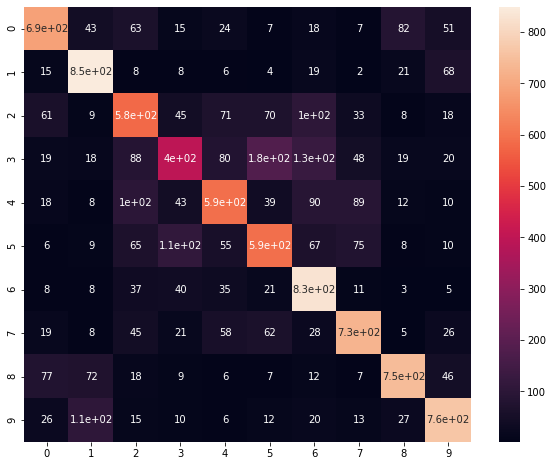

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

The image is a automobile


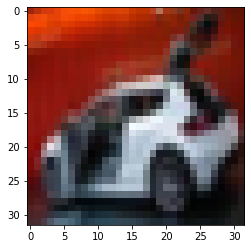

In [74]:
#predicting single image

true_cat = {
 0 : 'airplane',
 1 : 'automobile',
 2 : 'bird',
 3 : 'cat',
 4 : 'deer',
 5 : 'dog',
 6 : 'frog',
 7 :'horse',
 8 : 'ship',
 9 : 'truck'}

new_image = x_test[6]
plt.imshow(new_image)
ans = model.predict_classes(new_image.reshape(1,32,32,3))[0]
print(f"The image is a {true_cat[ans]}")